# Dataset financial_phrasebank

Polar sentiment dataset of sentences from financial news. The dataset consists of 4840 sentences from English language financial news categorised by sentiment. The dataset is divided by agreement rate of 5-8 annotators.

https://huggingface.co/datasets/takala/financial_phrasebank

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 300,
})

In [87]:
def load_financial_phrasebank(filepath):
    data = []
    with open(filepath, encoding="iso-8859-1") as f:
        for line in f:
            sentence, label = line.rsplit("@", 1)
            data.append({
                "sentence": sentence.strip(),
                "label": label.strip()
            })
    return data

path_to_files = "data/FinancialPhraseBank-v1.0/"
files_base_name = "Sentences_"
possible_datasets = ["50Agree", "66Agree", "75Agree", "AllAgree"]
files_ends_with = ".txt"

## Read the dataset

In [88]:
for dataset in possible_datasets:
    file_path = f"{path_to_files}{files_base_name}{dataset}{files_ends_with}"
    data = load_financial_phrasebank(file_path)
    print(f"Loaded {len(data)} sentences from {file_path}")
    
# Example of how to access the data
for item in data[:5]:
    print(f"Sentence: {item['sentence']}, Label: {item['label']}")

Loaded 4846 sentences from data/FinancialPhraseBank-v1.0/Sentences_50Agree.txt
Loaded 4217 sentences from data/FinancialPhraseBank-v1.0/Sentences_66Agree.txt
Loaded 3453 sentences from data/FinancialPhraseBank-v1.0/Sentences_75Agree.txt
Loaded 2264 sentences from data/FinancialPhraseBank-v1.0/Sentences_AllAgree.txt
Sentence: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ., Label: neutral
Sentence: For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ., Label: positive
Sentence: In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn ., Label: positive
Sentence: Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales ., Label: positive
Sente

In [89]:
x = pd.DataFrame(load_financial_phrasebank(f"{path_to_files}{files_base_name}50Agree{files_ends_with}"))
y = pd.DataFrame(load_financial_phrasebank(f"{path_to_files}{files_base_name}66Agree{files_ends_with}"))
z = pd.DataFrame(load_financial_phrasebank(f"{path_to_files}{files_base_name}75Agree{files_ends_with}"))
a = pd.DataFrame(load_financial_phrasebank(f"{path_to_files}{files_base_name}AllAgree{files_ends_with}"))

pd.DataFrame({
    '50Agree': x['label'].value_counts().sort_index(),
    '66Agree': y['label'].value_counts().sort_index(),
    '75Agree': z['label'].value_counts().sort_index(),
    'AllAgree': a['label'].value_counts().sort_index()
}).fillna(0).astype(int) # as much negatives for both datasets, undersample will result in more or less the same...

,50Agree,66Agree,75Agree,AllAgree
label,,,,
negative,604,514,420,303
neutral,2879,2535,2146,1391
positive,1363,1168,887,570


## Are there repeated sentences?

In [90]:
for dataset in possible_datasets:
    file_path = f"{path_to_files}{files_base_name}{dataset}{files_ends_with}"
    data = load_financial_phrasebank(file_path)
    print(f"Dataset: {dataset}, Number of sentences: {len(data)}, Number of unique sentences: {len(set(item['sentence'] for item in data))}")

Dataset: 50Agree, Number of sentences: 4846, Number of unique sentences: 4838
Dataset: 66Agree, Number of sentences: 4217, Number of unique sentences: 4211
Dataset: 75Agree, Number of sentences: 3453, Number of unique sentences: 3448
Dataset: AllAgree, Number of sentences: 2264, Number of unique sentences: 2259


In [91]:
all_data = []
for dataset in possible_datasets:
    file_path = f"{path_to_files}{files_base_name}{dataset}{files_ends_with}"
    data = load_financial_phrasebank(file_path)
    all_data.extend(data)

print(f"Total number of sentences across all datasets: {len(all_data)}")
print(f"Total number of unique sentences across all datasets: {len(set(item['sentence'] for item in all_data))}")

Total number of sentences across all datasets: 14780
Total number of unique sentences across all datasets: 4838


Note that we only should choose one of the `possible_datasets`.

In [92]:
chosen_dataset = "75Agree" # chosen because of the next code cell

data = pd.DataFrame(load_financial_phrasebank(f"{path_to_files}{files_base_name}{chosen_dataset}{files_ends_with}"))
data.head()

,sentence,label
0,"According to Gran , the company has no plans t...",neutral
1,With the new production plant the company woul...,positive
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,"In the third quarter of 2010 , net sales incre...",positive
4,Operating profit rose to EUR 13.1 mn from EUR ...,positive


In [93]:
# *next code cell*

a = pd.DataFrame(load_financial_phrasebank(f"{path_to_files}{files_base_name}75Agree{files_ends_with}"))
b = pd.DataFrame(load_financial_phrasebank(f"{path_to_files}{files_base_name}66Agree{files_ends_with}"))

pd.DataFrame({
    '75Agree': a['label'].value_counts().sort_index(),
    '66Agree': b['label'].value_counts().sort_index()
}).fillna(0).astype(int) # as much negatives for both datasets, undersample will result in more or less the same...

,75Agree,66Agree
label,,
negative,420,514
neutral,2146,2535
positive,887,1168


# Chosen dataset EDA:

In [94]:
print(f"Dataset {chosen_dataset} loaded with {len(data)} sentences.")

Dataset 75Agree loaded with 3453 sentences.


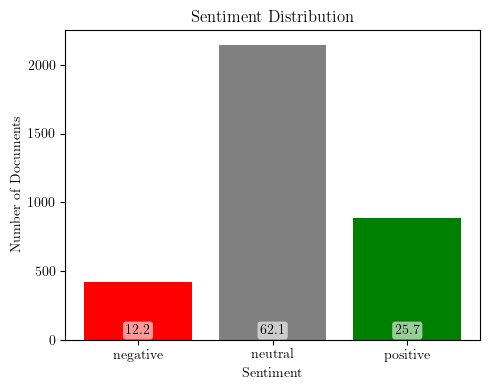

In [ ]:
label_counts = data["label"].value_counts()
df = label_counts.reset_index()
df.columns = ['label', 'count']
df = df.set_index('label').loc[['negative', 'neutral', 'positive']].reset_index()
df['percent'] = (df['count'] / df['count'].sum() * 100).round(1).astype(str) + '%'
colors = ['red', 'grey', 'green']
fig, ax = plt.subplots()
bars = ax.bar(df['label'], df['count'], color=colors)
for bar, pct in zip(bars, df['percent']):
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        25, 
        pct, 
        ha='center', 
        va='bottom', 
        color='black', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.6)
    )

ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Documents')
ax.set_title('Sentiment Distribution')
plt.tight_layout()
plt.savefig("assets/sentiment_distribution.png", bbox_inches='tight', transparent=True)
plt.show()


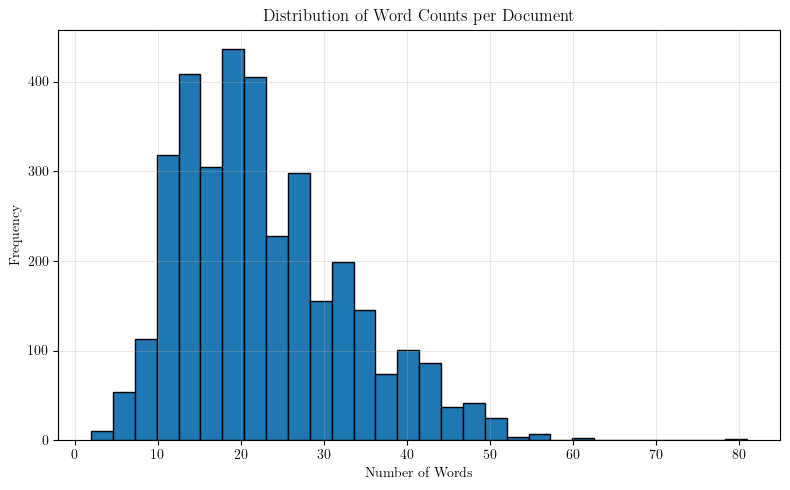

Minimum number of words in a document: 2
Average number of words per document: 22.76
Maximum number of words in a document: 81


,sentence,label
724,All are welcome .,neutral
785,Welcome !,neutral
1222,"Supported Nokia phones include : N96 , N95-8GB...",neutral
1548,All rights reserved .,neutral
1638,Net investment income,neutral
1669,Registration is required .,neutral
1684,Status : Agreed,neutral
2018,It 's not .,neutral
2075,NWC ANALYSIS :,neutral
2106,R&D Loan ) .,neutral


In [96]:
word_counts = data["sentence"].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
plt.hist(word_counts, bins=30, edgecolor='black')
plt.title("Distribution of Word Counts per Document")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("assets/word_count_distribution.png", transparent=True)
plt.show()

print(f"Minimum number of words in a document: {word_counts.min()}")
print(f"Average number of words per document: {word_counts.mean():.2f}")
print(f"Maximum number of words in a document: {word_counts.max()}")

data[(data["sentence"].apply(lambda x: len(x.split())) < 5) | (data["sentence"].apply(lambda x: len(x.split())) > 75)]

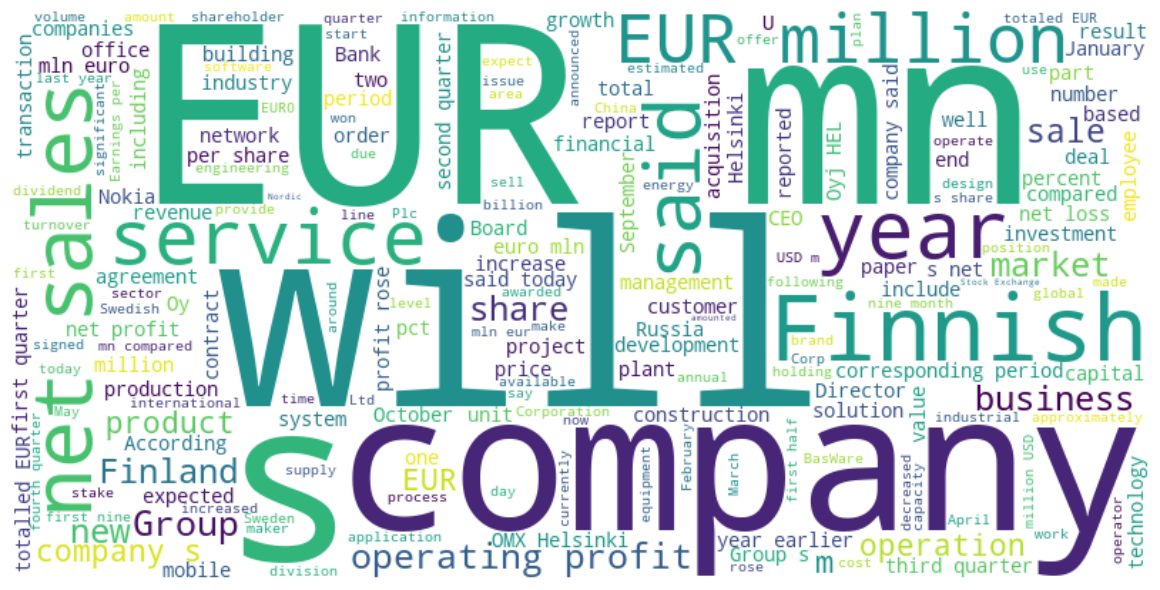

In [97]:
text = ' '.join(data["sentence"].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig("assets/word_cloud_75agree.png", transparent=True)
plt.show()

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

texts = data['sentence'].astype(str).tolist()
labels = data['label'].astype('category')

# tf-idf vectorization
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(texts)
y = labels.cat.codes

# compute chi-squared scores
chi2_vals, _ = chi2(X, y)
feature_names = tfidf.get_feature_names_out()

# sort and display top k features based on chi-squared scores
top_k = 20
chi2_scores = sorted(zip(feature_names, chi2_vals), key=lambda x: x[1], reverse=True)[:top_k]

for term, score in chi2_scores:
    print(f"{term:20s}  chi-sqr = {score:.2f}")

mn                    chi-sqr = 137.05
down                  chi-sqr = 120.51
decreased             chi-sqr = 111.62
eur                   chi-sqr = 101.69
profit                chi-sqr = 74.88
fell                  chi-sqr = 73.12
rose                  chi-sqr = 65.78
from                  chi-sqr = 61.82
compared              chi-sqr = 57.43
loss                  chi-sqr = 56.16
increased             chi-sqr = 51.43
period                chi-sqr = 49.29
year                  chi-sqr = 49.18
operating             chi-sqr = 44.09
corresponding         chi-sqr = 41.25
lower                 chi-sqr = 39.03
quarter               chi-sqr = 38.02
is                    chi-sqr = 33.93
increase              chi-sqr = 33.83
dropped               chi-sqr = 32.11


# Create a train/test set for the chosen dataset (75Agree)

In [99]:
from sklearn.model_selection import train_test_split

save_new_75test_set = False

if save_new_75test_set:
    df_75Agree = pd.DataFrame(load_financial_phrasebank(f"{path_to_files}{files_base_name}75Agree{files_ends_with}"))
    df_train, df_test = train_test_split(
        df_75Agree, test_size=0.2, stratify=df_75Agree["label"], random_state=42
    )

    df_train.to_csv(f"data/75Agree_train.csv", index=False)
    df_test.to_csv(f"data/75Agree_test.csv", index=False)

    # Create a new DataFrame for all training data (ANY AGREEMENT LEVEL)
    # get all senteces but the test set
    df_alltrain = pd.DataFrame(load_financial_phrasebank(f"{path_to_files}{files_base_name}50Agree{files_ends_with}")).drop_duplicates()
    df_alltrain = df_alltrain[~df_alltrain['sentence'].isin(df_test['sentence'])]
    # labels for the agreement levels
    df_alltrain['agreement'] = '50Agree'
    for level in ["66Agree", "75Agree", "AllAgree"]:
        df_temp = pd.DataFrame(load_financial_phrasebank(f"{path_to_files}{files_base_name}{level}{files_ends_with}"))
        matching_sentences = df_alltrain['sentence'].isin(df_temp['sentence'])
        df_alltrain.loc[matching_sentences, 'agreement'] = level
    df_alltrain.to_csv(f"data/AnyAgree_train.csv", index=False)

else:
    df_train = pd.read_csv(f"data/75Agree_train.csv")
    df_test = pd.read_csv(f"data/75Agree_test.csv")
    df_alltrain = pd.read_csv(f"data/AnyAgree_train.csv")

pd.DataFrame({
    '75Train': df_train['label'].value_counts().sort_index(),
    '75Train (%)': df_train['label'].value_counts(normalize=True).sort_index() * 100,
    'AnyTrain': df_alltrain['label'].value_counts().sort_index(),
    'AnyTrain (%)': df_alltrain['label'].value_counts(normalize=True).sort_index() * 100,
    '|': '|',
    'Test': df_test['label'].value_counts().sort_index(),
    'Test (%)': df_test['label'].value_counts(normalize=True).sort_index() * 100
}).fillna(0)

,75Train,75Train (%),AnyTrain,AnyTrain (%),|,Test,Test (%)
label,,,,,,,
negative,336,12.165098,520,12.533141,|,84,12.156295
neutral,1717,62.165098,2444,58.905760,|,429,62.083936
positive,709,25.669804,1185,28.561099,|,178,25.759768
